## Change in top 4 military spenders

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
# Carrega os dados da planilha militaryexpenditures.csv
milexp_df = pd.read_csv('./military_expenditure/militaryexpenditure.csv', sep=';')

# Exclui as regiões classificadas como "Regions Clubbed Economically" por serem muito generalistas
milexp_df = milexp_df[~milexp_df['Type'].isin(['Regions Clubbed Economically'])]

# Exclui as regiões "World", "North America" e "Middle income" por serem muito generalistas
milexp_df = milexp_df.loc[~milexp_df['Name'].isin(['World', 'North America', 'Middle income'])]

In [150]:
# Retorna o n-ésimo maior gastador militar em cada ano.
def n_maior_gastador(df, n):

    df['Rank'] = df.groupby('year')['Valor'].rank(method='dense', ascending=False)
    n_maior = df.loc[df['Rank'] == n]
    return n_maior

# 5 maiores gastadores militares 
first_spender = n_maior_gastador(milexp_df.copy(), 1)
second_spender = n_maior_gastador(milexp_df.copy(), 2)
third_spender = n_maior_gastador(milexp_df.copy(), 3)
fourth_spender = n_maior_gastador(milexp_df.copy(), 4)

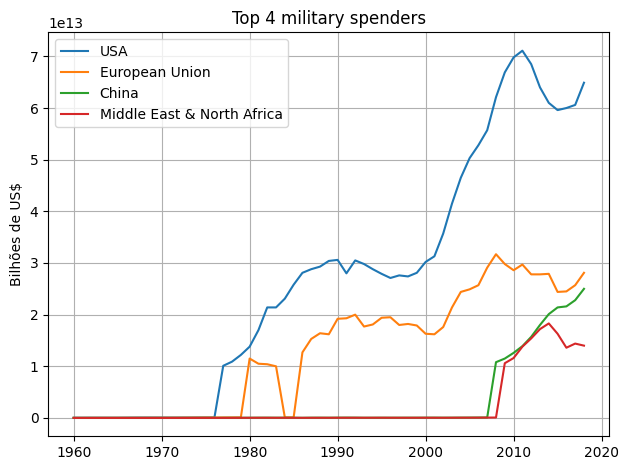

In [151]:
# Gráfico com os 5 maiores gastadores militares desde 1960

plt.plot(first_spender.sort_values(by=['year'])['year'], first_spender.sort_values(by=['year'])['Valor'])
plt.plot(second_spender.sort_values(by=['year'])['year'], second_spender.sort_values(by=['year'])['Valor'])
plt.plot(third_spender.sort_values(by=['year'])['year'], third_spender.sort_values(by=['year'])['Valor'])
plt.plot(fourth_spender.sort_values(by=['year'])['year'], fourth_spender.sort_values(by=['year'])['Valor'])
plt.ylabel('Bilhões de US$')
plt.title('Top 4 military spenders')
plt.grid(True)
plt.tight_layout()
plt.legend(['USA', 'European Union', 'China', 'Middle East & North Africa'])
plt.show()

## Relation between nuclear tests and increase of own nuclear arsenal

In [152]:
df_tests = pd.read_csv('./nuclear_explosion/nuclear_explosions.csv')
df_tests
#df_tests['country_name'].unique()

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998


In [153]:
df_tests = df_tests[['Date.Year', 'WEAPON SOURCE COUNTRY']].groupby(by=['Date.Year', 'WEAPON SOURCE COUNTRY']).count()
df_tests.head(20)

Empty DataFrame
Columns: []
Index: [(1945, USA), (1946, USA), (1948, USA), (1949, USSR), (1951, USA), (1951, USSR), (1952, UK), (1952, USA), (1953, UK), (1953, USA), (1953, USSR), (1954, USA), (1954, USSR), (1955, USA), (1955, USSR), (1956, UK), (1956, USA), (1956, USSR), (1957, UK), (1957, USA)]

In [81]:
df_arsenal = pd.read_csv('./nuclear_weapon/nuclear_weapons_stockpiles.csv')
usa = df_arsenal[df_arsenal["country_name"].str.contains('United States')]
russia = df_arsenal[df_arsenal["country_name"].str.contains('Russia')]
china = df_arsenal[df_arsenal["country_name"].str.contains('China')]
#df_arsenal['country_name'].unique()

In [75]:
df_inner = df_tests.merge(df_arsenal, left_on='Date.Year', right_on='year')
df_inner

,country_name_x,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,country_name_y,year,nuclear_weapons_stockpile
0,United States,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,16,7,1945,China,1945,0
1,United States,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,16,7,1945,France,1945,0
2,United States,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,16,7,1945,India,1945,0
3,United States,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,16,7,1945,Israel,1945,0
4,United States,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,16,7,1945,North Korea,1945,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,Pakistan,Kharan,HFS,28.49,63.78,5.0,0.0,0.0,0.0,18.0,Wr,Nan,Ug,30,5,1998,Pakistan,1998,2
20456,Pakistan,Kharan,HFS,28.49,63.78,5.0,0.0,0.0,0.0,18.0,Wr,Nan,Ug,30,5,1998,Russia,1998,14368
20457,Pakistan,Kharan,HFS,28.49,63.78,5.0,0.0,0.0,0.0,18.0,Wr,Nan,Ug,30,5,1998,South Africa,1998,0
20458,Pakistan,Kharan,HFS,28.49,63.78,5.0,0.0,0.0,0.0,18.0,Wr,Nan,Ug,30,5,1998,United Kingdom,1998,240


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


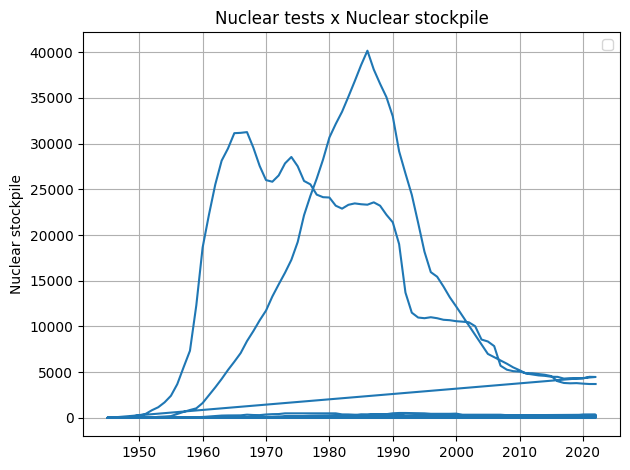

In [56]:
plt.plot(df_arsenal['year'], df_arsenal['nuclear_weapons_stockpile'], )
plt.ylabel('Nuclear stockpile')
plt.title('Nuclear tests x Nuclear stockpile')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()